#  <h1><font color= red><center>California House Prices</center></font></h1>


#### <h1><font color = blue><center>About my dataset</center></font></h1>

<font color = darkblue><B><I>I am using the 2017 property dataset from Zillow dataset from Kaggle competitions. This dataset contains millions of rows with over fifty columns each filled with data based on home purchased in Los Angeles, Orange and Ventura counties that were sold between January and September of 2017.  Inside I was able to find the prices homes were sold at, the square footage they had, how many bedrooms each home had and much much more. You can find out more on this dataset <a href= "https://www.kaggle.com/c/zillow-prize-1/data">here</a></I></B></font>

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import scipy
%matplotlib inline

plt.rcParams['figure.figsize'] = (20.0, 10.0)
plt.rcParams.update({'font.size': 16})

In [2]:
zillow_dataset = pd.read_csv('properties_2017.csv')

C:\Users\blindside\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2698: DtypeWarning: Columns (49) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


#### <h1><font color = blue><center>Explore the data</center></font></h1>

In [3]:
zillow_dataset_cols = ["bathroomcnt", "bedroomcnt", "calculatedfinishedsquarefeet",
                       "landtaxvaluedollarcnt", "lotsizesquarefeet","regionidzip",
                       "structuretaxvaluedollarcnt", "yearbuilt"]
zillow_subset = zillow_dataset[zillow_dataset_cols]

In [4]:
#Dropping rows with NAs
zillow_subset = zillow_subset.dropna(axis = 0, how = 'any')

In [5]:
#Made a new column by adding the value of the structure to the land value
zillow_subset['total_value'] = (zillow_subset.loc[:,('landtaxvaluedollarcnt')] + 
                            zillow_subset.loc[:,('structuretaxvaluedollarcnt')])

In [6]:
#Dropping rows with zeros
zillow_subset= zillow_subset[(zillow_subset.T != 0).all(axis=0)]

In [51]:
zillow_subset.head()

,bathroomcnt,bedroomcnt,calculatedfinishedsquarefeet,landtaxvaluedollarcnt,lotsizesquarefeet,regionidzip,structuretaxvaluedollarcnt,yearbuilt,total_value
20,2.0,4.0,3633.0,74104.0,9826.0,97329.0,222321.0,2005.0,296425.0
28,4.0,5.0,2865.0,559520.0,4990.0,96124.0,271704.0,1972.0,831224.0
30,2.0,2.0,1090.0,124671.0,40247.0,96072.0,232897.0,2004.0,357568.0
33,2.0,3.0,2077.0,436568.0,6490.0,96152.0,210192.0,1926.0,646760.0
45,2.0,4.0,1931.0,99828.0,5420.0,96018.0,124789.0,1957.0,224617.0


#### <font color = lightblue><B><I>My Variables</I></B></font>

In [7]:
total_value = zillow_subset.total_value
bathrooms = zillow_subset.bedroomcnt
bedrooms = zillow_subset.bathroomcnt
lot_sqft = zillow_subset.lotsizesquarefeet
finished_sqft = zillow_subset.calculatedfinishedsquarefeet
zip_code = zillow_subset.regionidzip
year_built = zillow_subset.yearbuilt
land_value = zillow_subset.landtaxvaluedollarcnt

In [28]:
zillow_subset.head()

,bathroomcnt,bedroomcnt,calculatedfinishedsquarefeet,landtaxvaluedollarcnt,lotsizesquarefeet,regionidzip,structuretaxvaluedollarcnt,yearbuilt,total_value
20,2.0,4.0,3633.0,74104.0,9826.0,97329.0,222321.0,2005.0,296425.0
28,4.0,5.0,2865.0,559520.0,4990.0,96124.0,271704.0,1972.0,831224.0
30,2.0,2.0,1090.0,124671.0,40247.0,96072.0,232897.0,2004.0,357568.0
33,2.0,3.0,2077.0,436568.0,6490.0,96152.0,210192.0,1926.0,646760.0
45,2.0,4.0,1931.0,99828.0,5420.0,96018.0,124789.0,1957.0,224617.0


In [29]:
zillow_subset.corr()

,bathroomcnt,bedroomcnt,calculatedfinishedsquarefeet,landtaxvaluedollarcnt,lotsizesquarefeet,regionidzip,structuretaxvaluedollarcnt,yearbuilt,total_value
bathroomcnt,1.000000,0.633198,0.684173,0.339699,0.008734,0.024521,0.566298,0.391274,0.457378
bedroomcnt,0.633198,1.000000,0.537317,0.152198,-0.034522,0.018259,0.288387,0.123144,0.217951
calculatedfinishedsquarefeet,0.684173,0.537317,1.000000,0.377537,-0.006596,0.030279,0.594403,0.242194,0.495180
landtaxvaluedollarcnt,0.339699,0.152198,0.377537,1.000000,-0.003067,0.014985,0.629288,0.072474,0.956391
lotsizesquarefeet,0.008734,-0.034522,-0.006596,-0.003067,1.000000,0.001504,0.011572,0.045959,0.002141
regionidzip,0.024521,0.018259,0.030279,0.014985,0.001504,1.000000,0.023608,0.046349,0.019660
structuretaxvaluedollarcnt,0.566298,0.288387,0.594403,0.629288,0.011572,0.023608,1.000000,0.298555,0.828849
yearbuilt,0.391274,0.123144,0.242194,0.072474,0.045959,0.046349,0.298555,1.000000,0.164380
total_value,0.457378,0.217951,0.495180,0.956391,0.002141,0.019660,0.828849,0.164380,1.000000


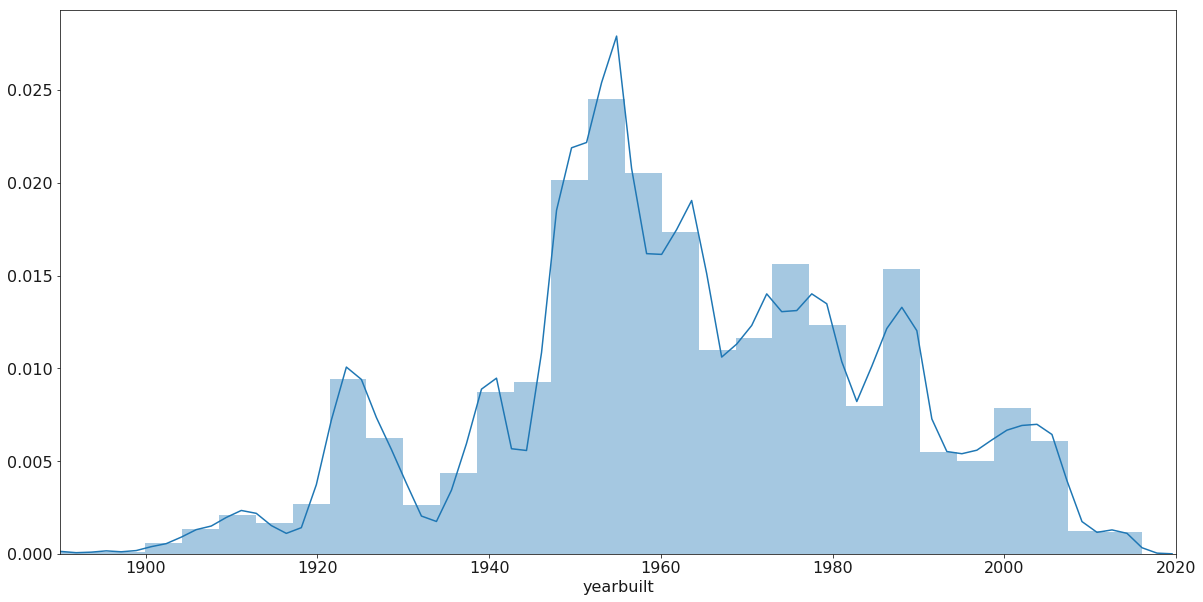

In [30]:
sns.distplot(year_built)
plt.xlim(1890, 2020)
plt.show()

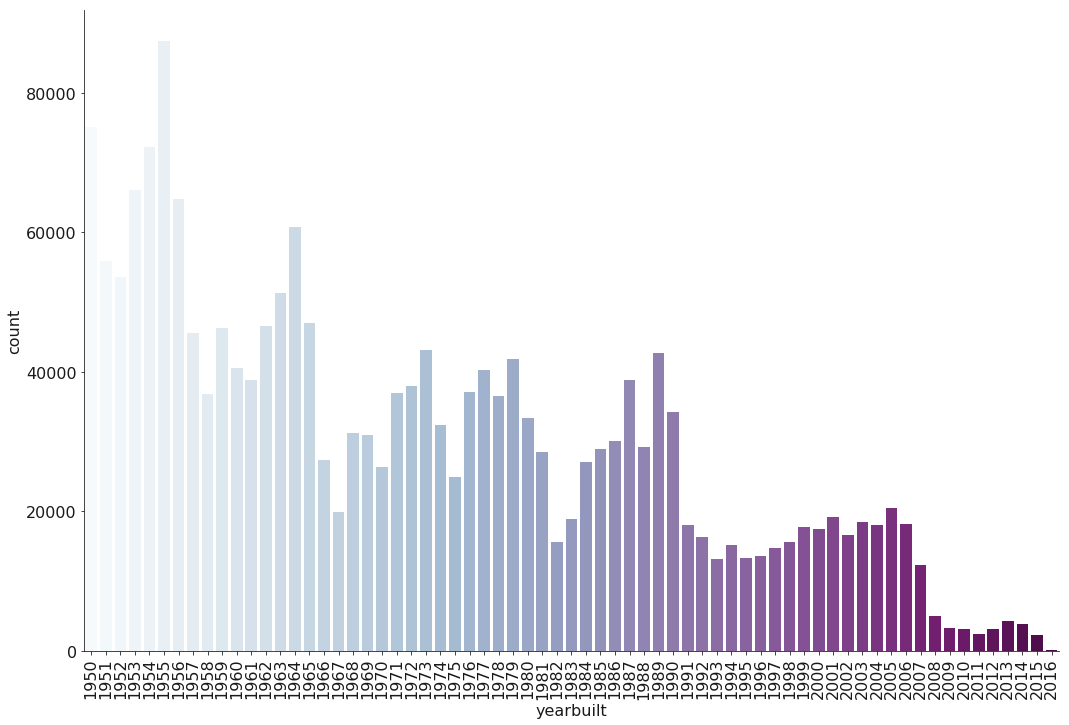

In [31]:
sns.factorplot(x="yearbuilt", data=zillow_subset, kind="count",
               palette="BuPu", size=10, aspect=1.5, order=np.arange(1950, 2017))
plt.xticks(rotation = 90)
plt.show()

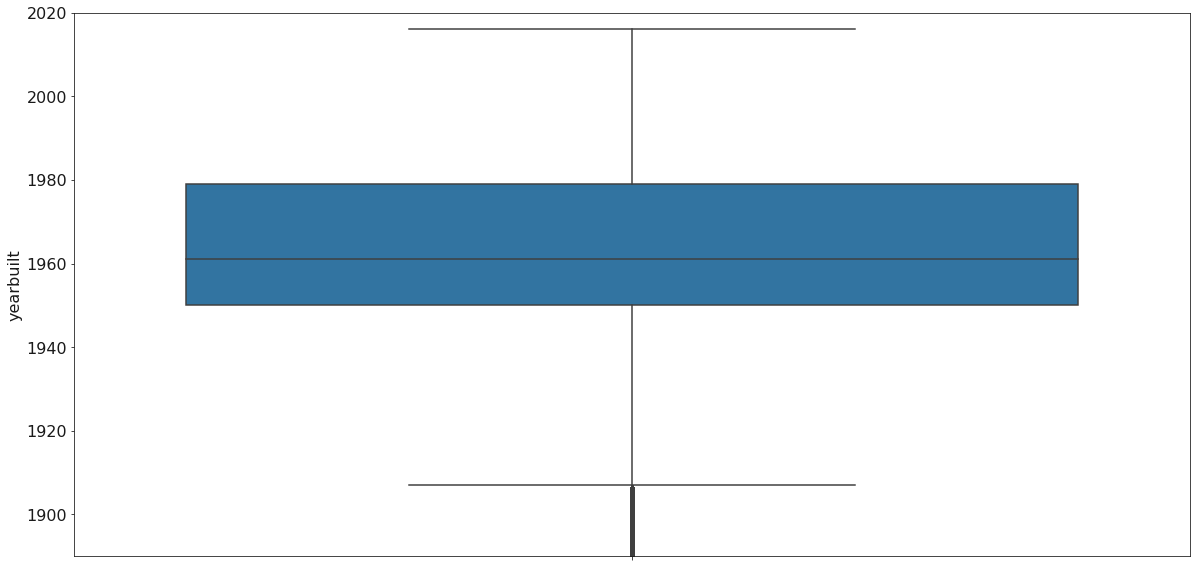

In [32]:
sns.boxplot(y= year_built)
plt.ylim(1890, 2020)
plt.show()

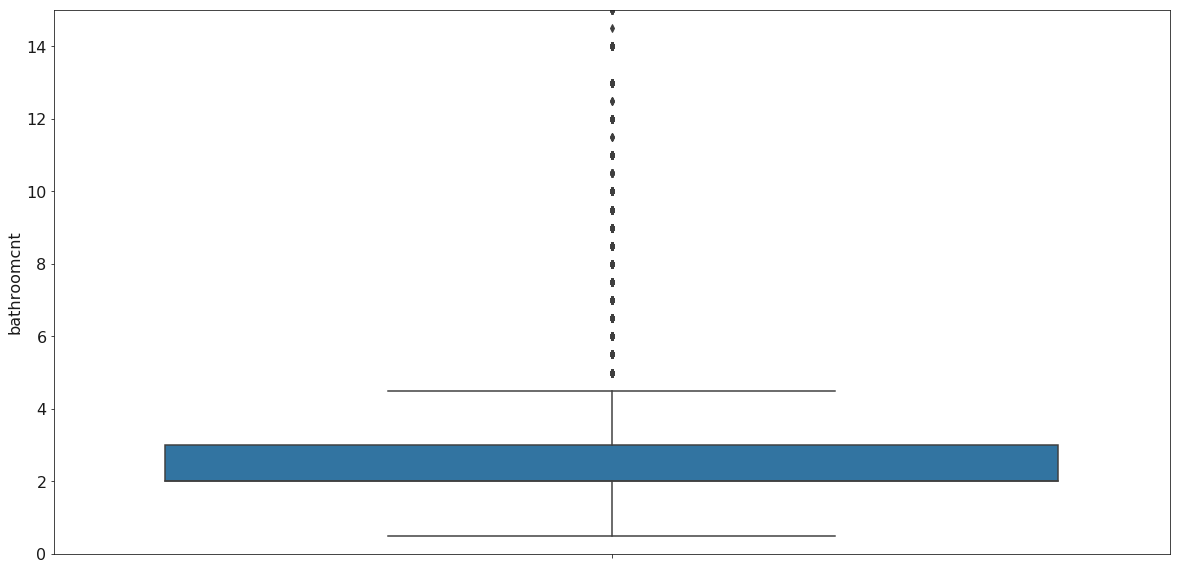

In [46]:
sns.boxplot(y= bedrooms)
plt.ylim(0, 15)
plt.show()

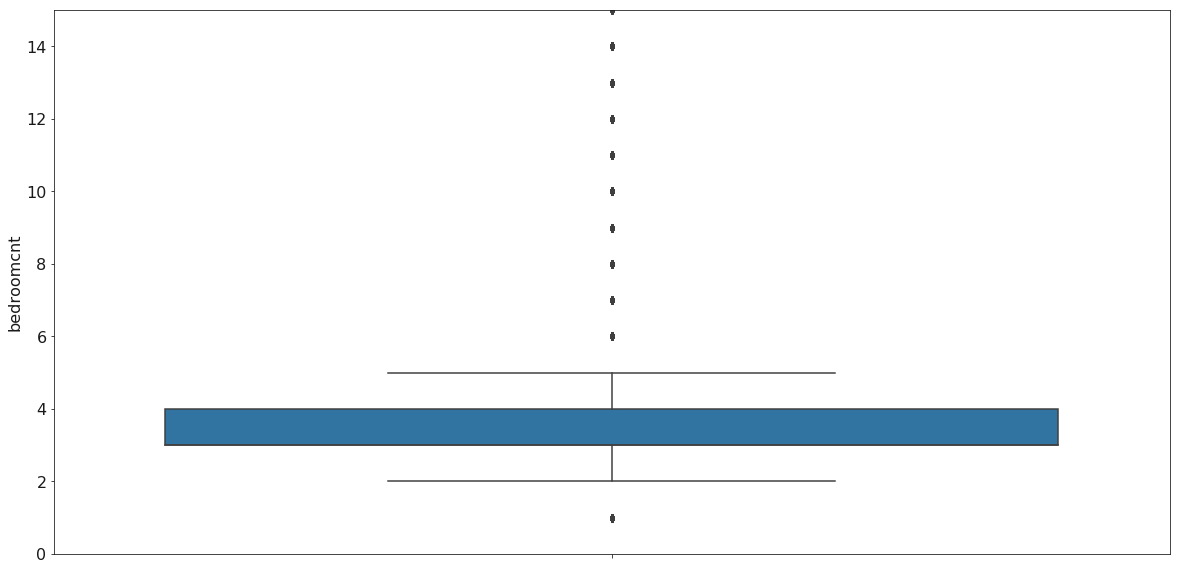

In [47]:
sns.boxplot(y= bathrooms)
plt.ylim(0, 15)
plt.show()

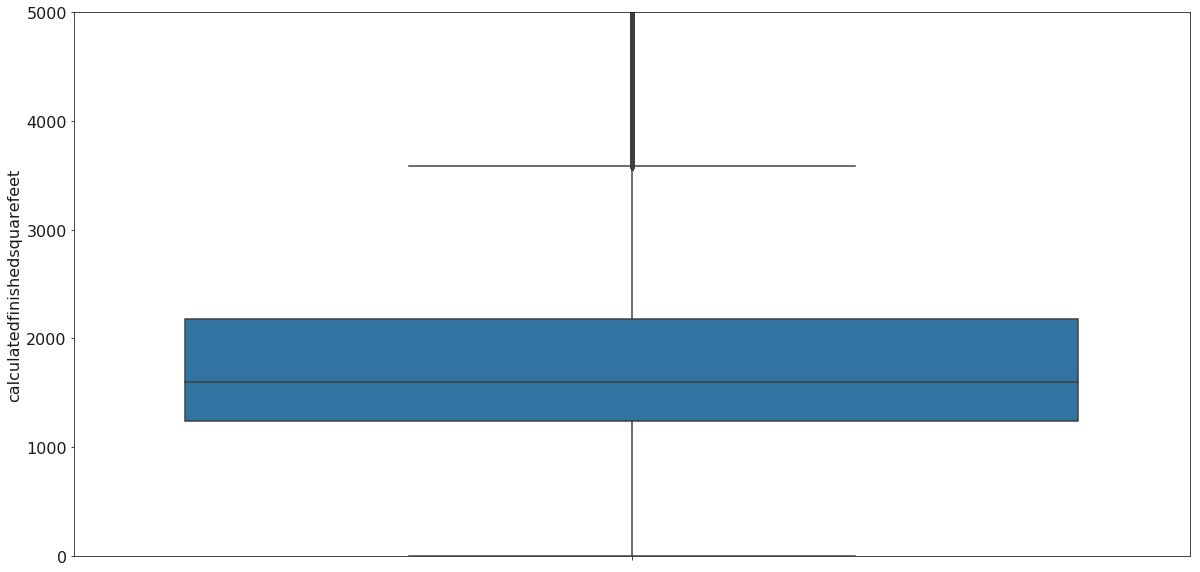

In [35]:
sns.boxplot(y= finished_sqft)
plt.ylim(0, 5000)
plt.show()

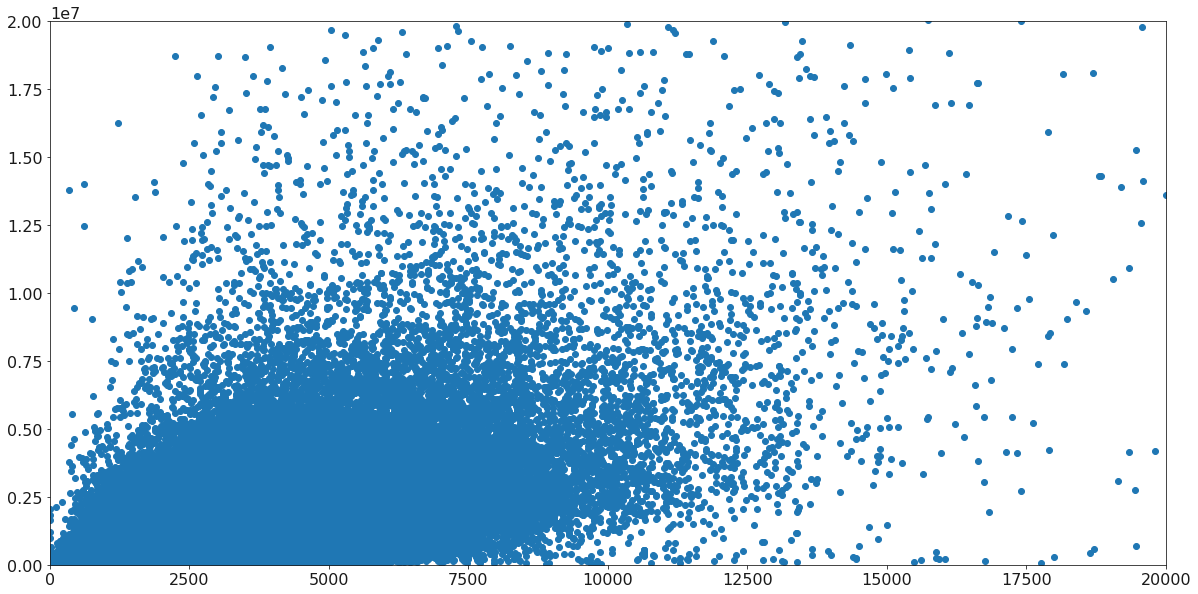

In [36]:
plt.scatter(x=finished_sqft, y=total_value)
plt.xlim(0, 20000)
plt.ylim(0, 20000000)
plt.show()

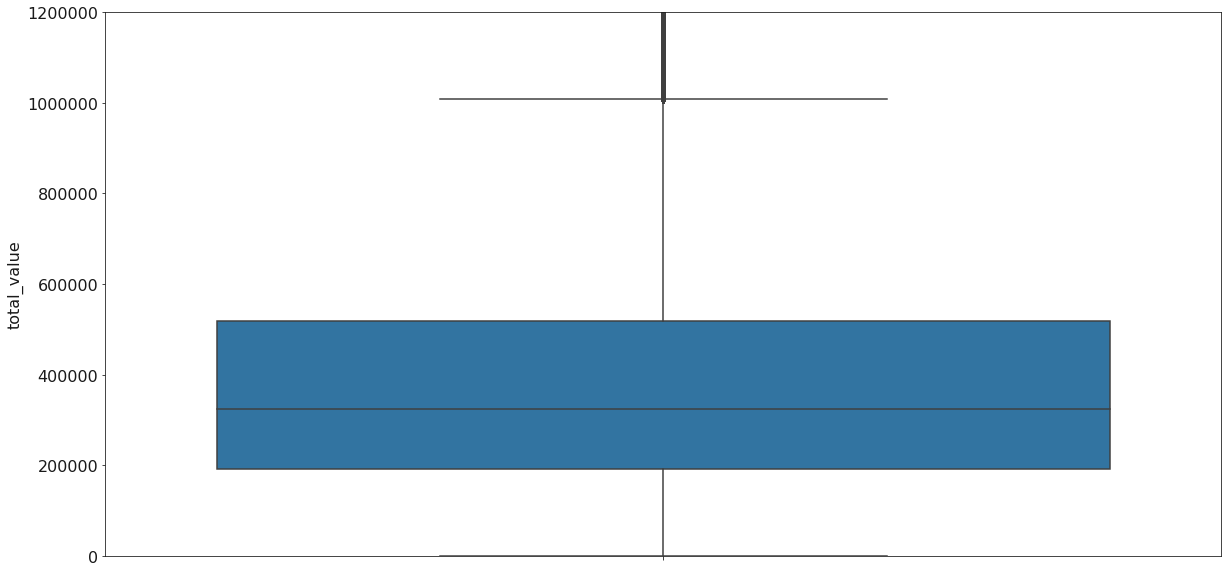

In [37]:
sns.boxplot(y =total_value)
plt.ylim(0, 1200000)
plt.show()

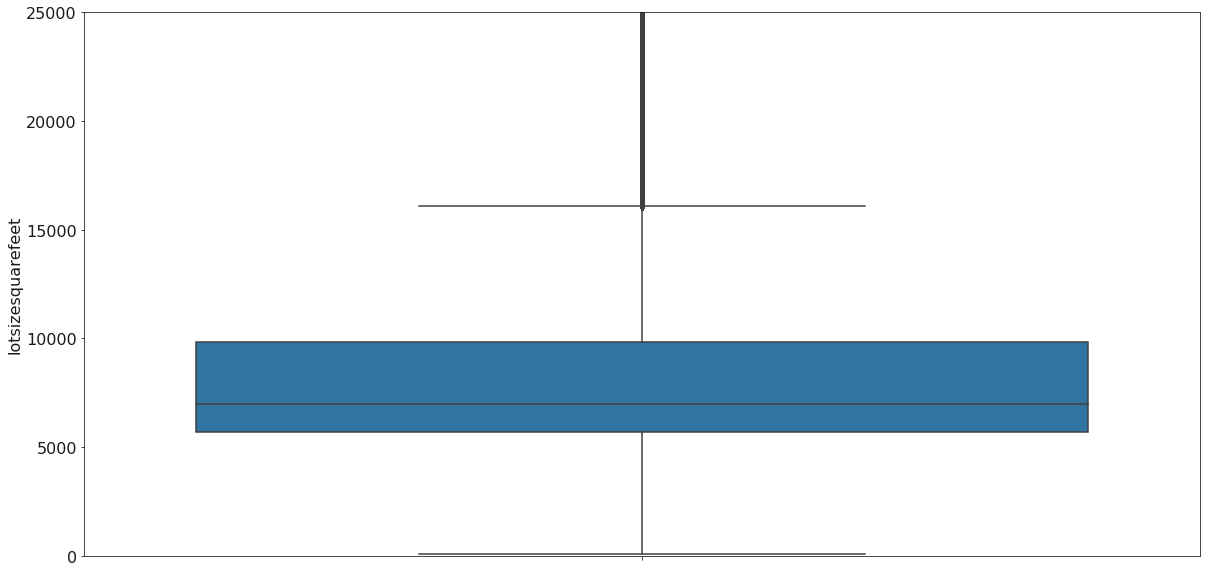

In [38]:
sns.boxplot(y= lot_sqft)
plt.ylim(0, 25000)
plt.show()

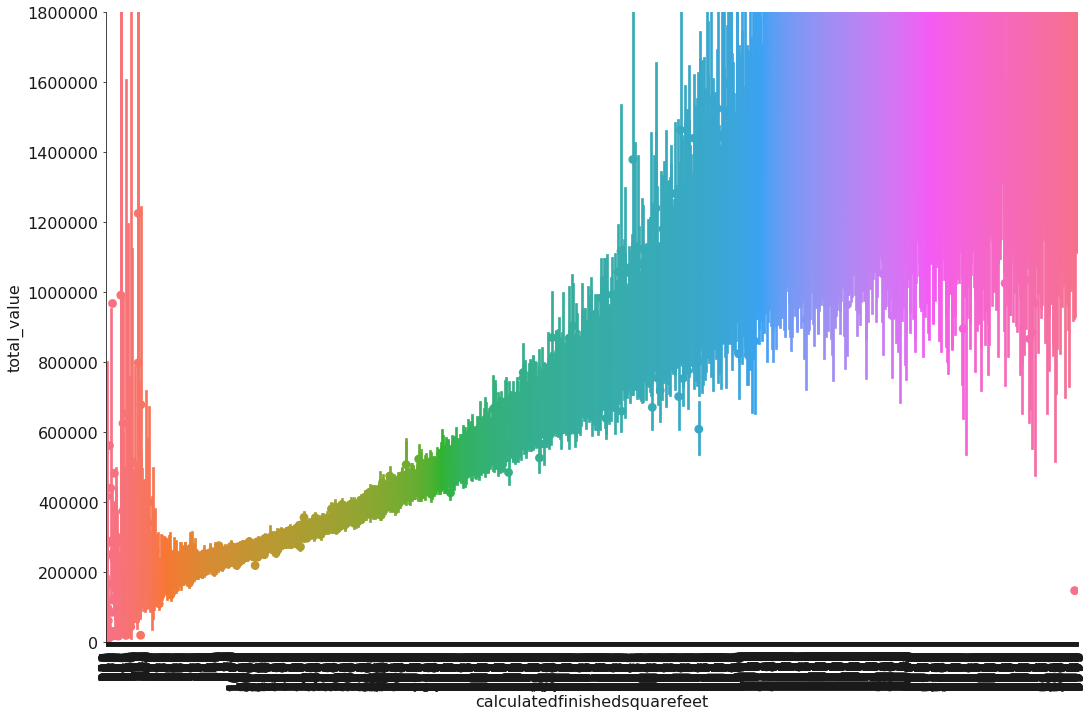

In [48]:
sns.factorplot(x="calculatedfinishedsquarefeet", y= 'total_value', data=zillow_subset, kind="point",
               palette="husl", size=10, aspect=1.5, order=np.arange(250, 6000))
plt.xticks(rotation = 90)
plt.ylim(0, 1800000, 200000)
plt.show()

#### <h1><font color = blue><center>Analytic Questions</center></font></h1>

<font color = darkblue><B><I>How much does the year a house is built affect the price?</I></B></font>

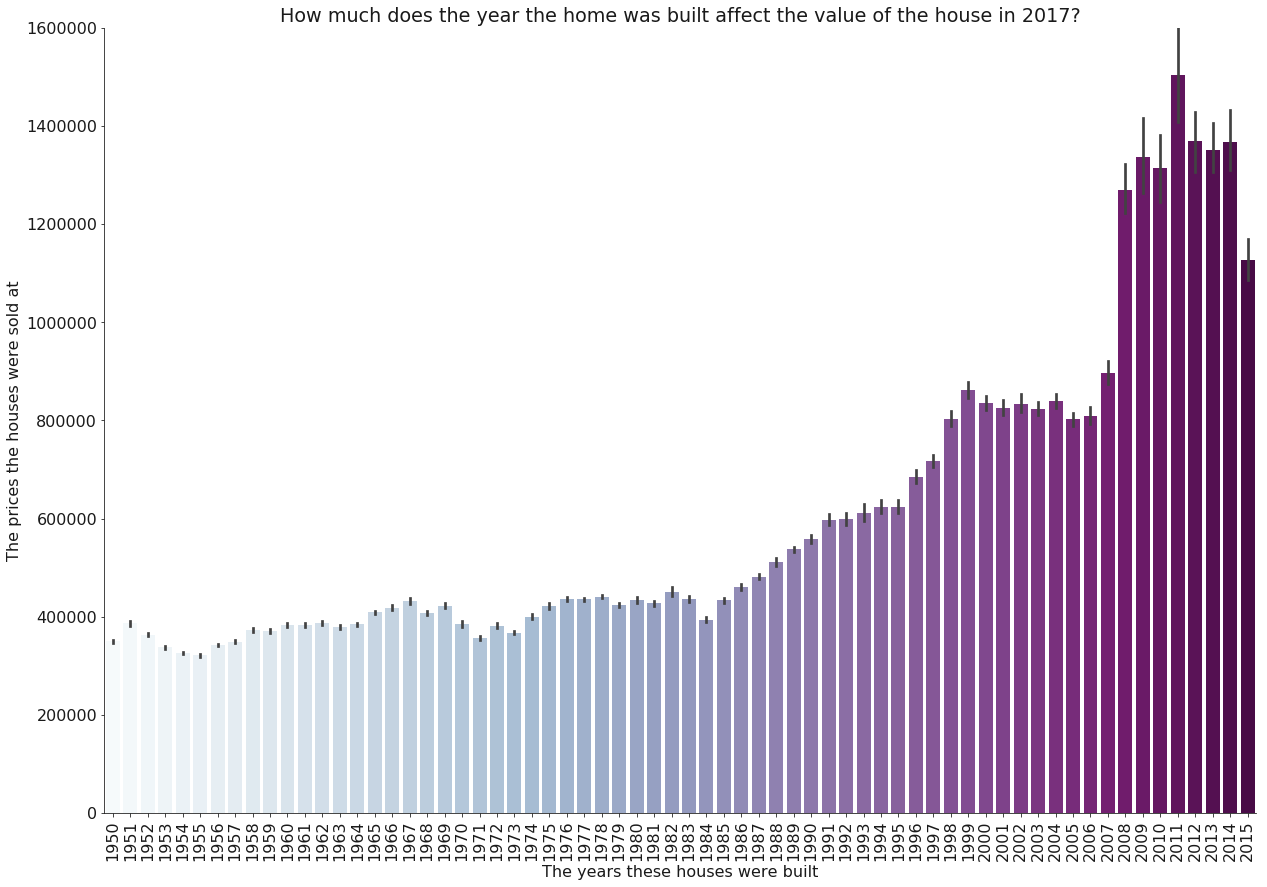

In [40]:
sns.factorplot(x="yearbuilt", y= 'total_value', data=zillow_subset, kind="bar",
               palette="BuPu", size=12, aspect=1.5, order=np.arange(1950, 2016))
plt.ylim(0, 1600000, 200000)
plt.xticks(rotation = 90)
plt.title('How much does the year the home was built affect the value of the house in 2017?')
plt.xlabel('The years these houses were built')
plt.ylabel('The prices the houses were sold at')
plt.show()

<font color = #800000><B><I>I was actually surprised to see there was such a radical difference. The houses built after 2007 ended up being much more expensive than the other houses. I ended up cutting out the 2016 homes, the small number (61) I had was not consistant with the results of the data. I believe one of the contributors of the high cost could be because of the shortage of newer homes in the market. Of the houses purchased during this time, there were far less homes built after 2007. Which is probably not surprising after the financial crisis that happened at that time. After seeing the great difference in homes build in the last decade, it led me to ask another question.</I></B></font>

<font color = darkblue><B><I>Is the price difference only related to the the houses being new or are the areas the houses were built in strongly affecting that price also?</I></B></font>

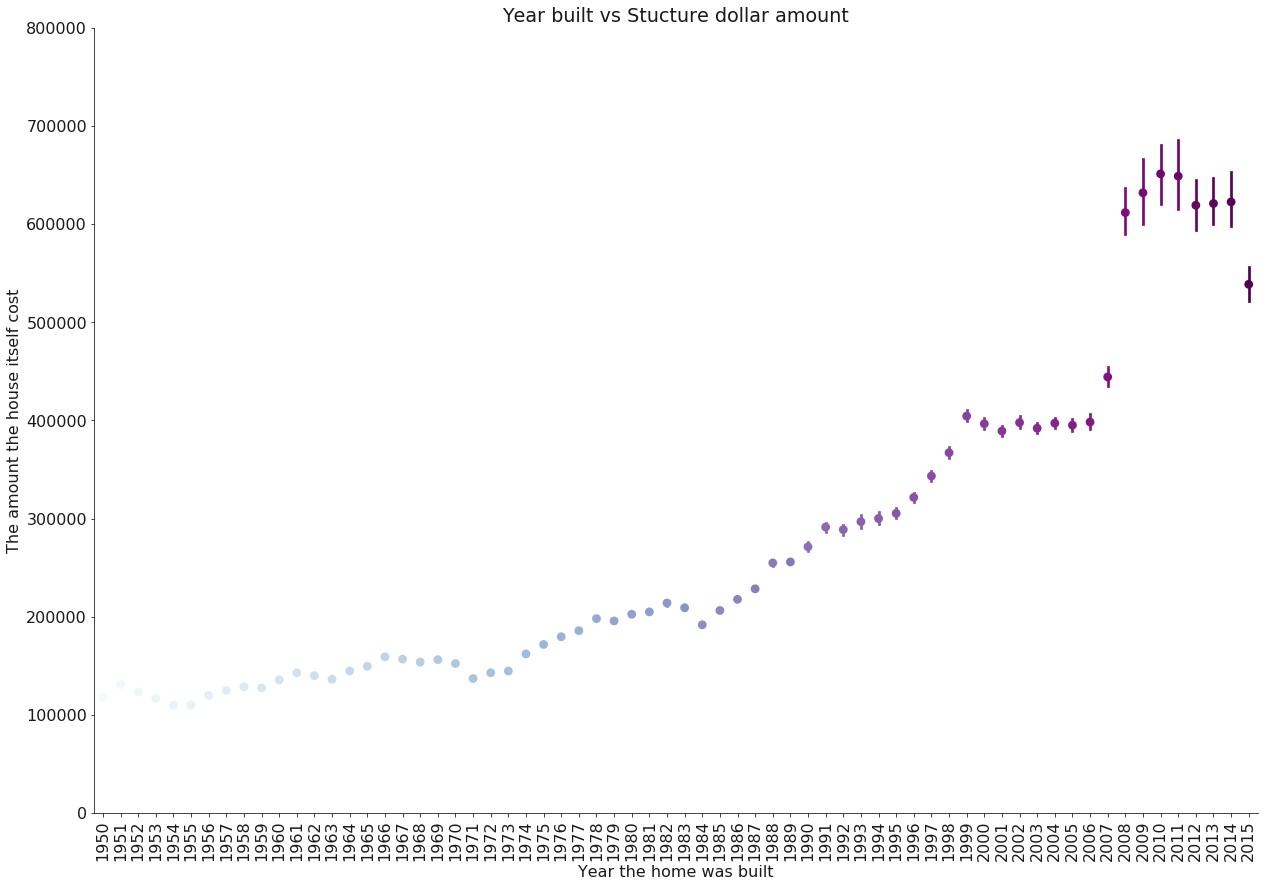

In [41]:
sns.factorplot(x="yearbuilt", y= 'structuretaxvaluedollarcnt', data=zillow_subset, kind="point",
               palette="BuPu", size=12, aspect=1.5, order=np.arange(1950, 2016))
plt.ylim(0, 800000, 100000)
plt.xticks(rotation = 90)
plt.title('Year built vs Stucture dollar amount')
plt.xlabel('Year the home was built')
plt.ylabel('The amount the house itself cost')
plt.show()

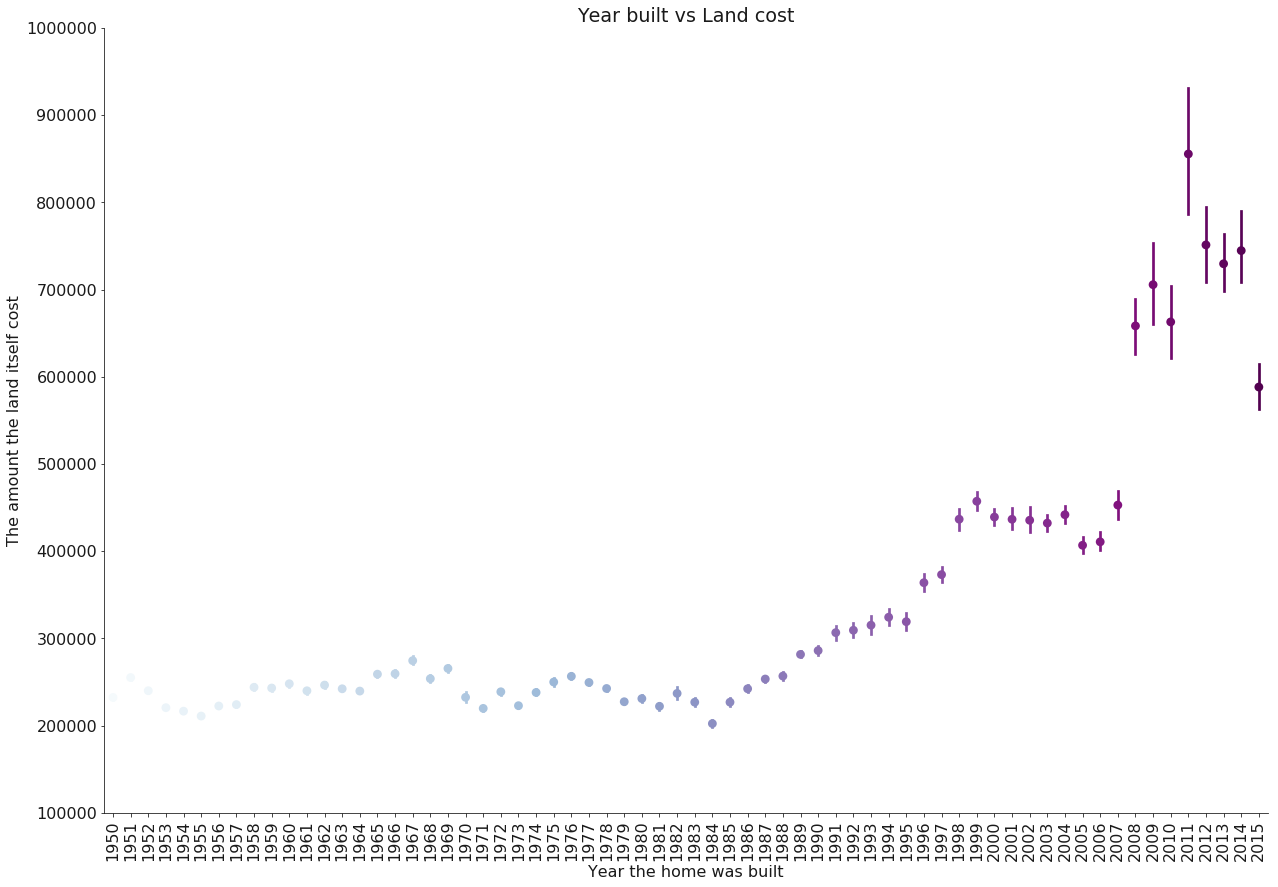

In [42]:
sns.factorplot(x="yearbuilt", y= 'landtaxvaluedollarcnt', data=zillow_subset, kind="point",
               palette="BuPu", size=12, aspect=1.5, order=np.arange(1950, 2016))
plt.ylim(100000, 1000000, 100000)
plt.title('Year built vs Land cost')
plt.xlabel('Year the home was built')
plt.ylabel('The amount the land itself cost')
plt.xticks(rotation = 90)
plt.show()

<font color = #800000><B><I>After viewing all the graphs one can see that difference there is a strong correlation between price, the area and in the year the home was built.</I></B></font>

<font color = darkblue><B><I>What are the average prices one pays for a home and how much of that is the price of land?</I></B></font>

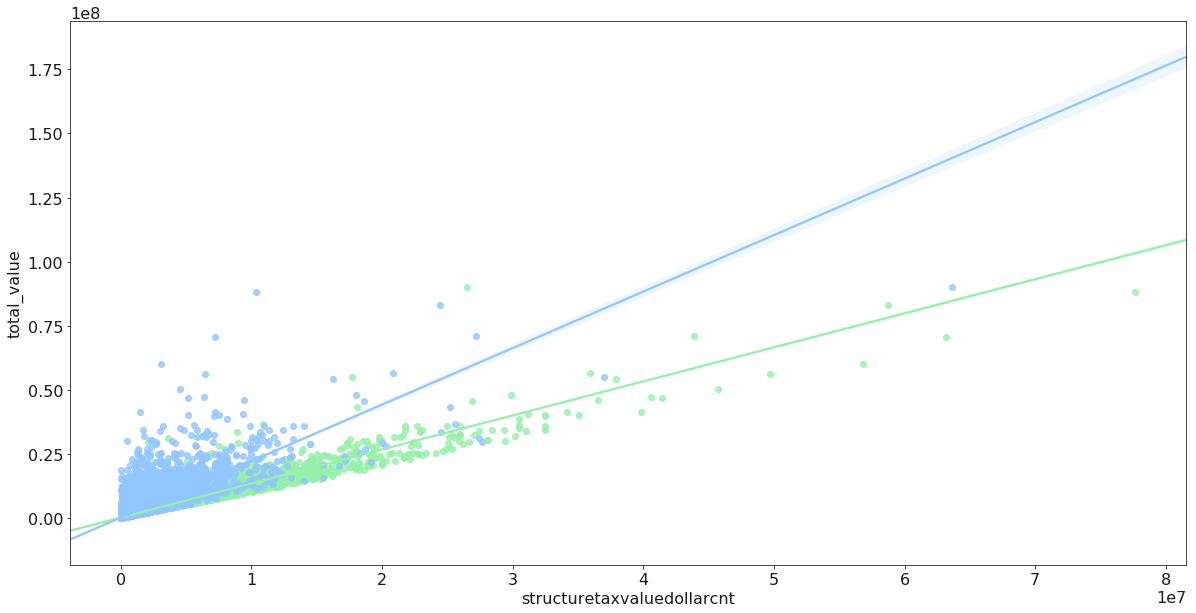

In [16]:
sns.set_color_codes("pastel")
sns.regplot('landtaxvaluedollarcnt', 'total_value', data= zillow_subset, color="g")
sns.regplot('structuretaxvaluedollarcnt', 'total_value', data= zillow_subset, color="b")
plt.show()

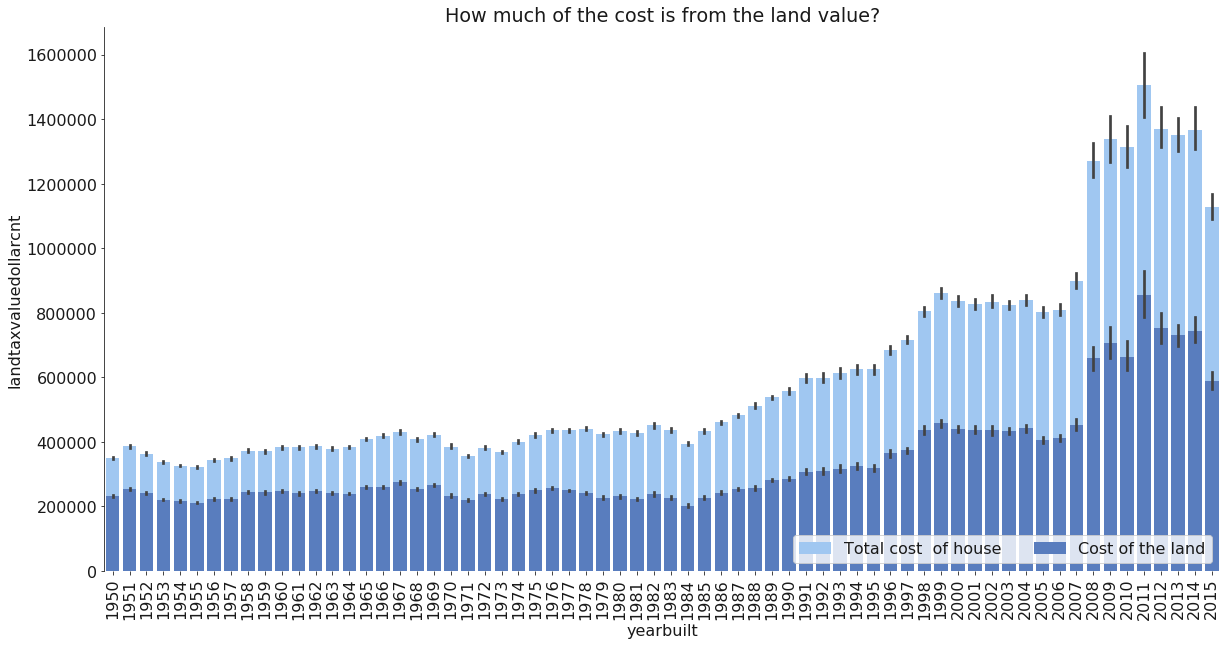

In [59]:
sns.set_color_codes("pastel")
sns.barplot(x="yearbuilt", y='total_value', data=zillow_subset,
            label="Total cost  of house", color="b", order=np.arange(1950, 2016))
sns.set_color_codes("muted")
sns.barplot(x="yearbuilt", y="landtaxvaluedollarcnt", data=zillow_subset,
            label="Cost of the land", color="b", order=np.arange(1950, 2016))

plt.legend(ncol=2, loc="lower right", frameon=True)
plt.title('How much of the cost is from the land value?')
plt.ylabel= ("Cost")
plt.xlabel=("Year the homes were built")
plt.xticks(rotation = 90)
sns.despine(left=False, bottom=True)
plt.show()